<a href="https://colab.research.google.com/github/jderazoa/ML-con-PYTHON/blob/master/purgedgrouptimeseries_cv_extra_data_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----

notebook_theme = 'carrot'
color_maps = {'turquoise': ['#1abc9c', '#e8f8f5', '#d1f2eb', '#a3e4d7', '#76d7c4', '#48c9b0', '#1abc9c', '#17a589', '#148f77', '#117864', '#0e6251'], 'green': ['#16a085', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', '#16a085', '#138d75', '#117a65', '#0e6655', '#0b5345'], 'emerald': ['#2ecc71', '#eafaf1', '#d5f5e3', '#abebc6', '#82e0aa', '#58d68d', '#2ecc71', '#28b463', '#239b56', '#1d8348', '#186a3b'], 'nephritis': ['#27ae60', '#e9f7ef', '#d4efdf', '#a9dfbf', '#7dcea0', '#52be80', '#27ae60', '#229954', '#1e8449', '#196f3d', '#145a32'], 'peter': ['#3498db', '#ebf5fb', '#d6eaf8', '#aed6f1', '#85c1e9', '#5dade2', '#3498db', '#2e86c1', '#2874a6', '#21618c', '#1b4f72'], 'belize': ['#2980b9', '#eaf2f8', '#d4e6f1', '#a9cce3', '#7fb3d5', '#5499c7', '#2980b9', '#2471a3', '#1f618d', '#1a5276', '#154360'], 'amethyst': ['#9b59b6', '#f5eef8', '#ebdef0', '#d7bde2', '#c39bd3', '#af7ac5', '#9b59b6', '#884ea0', '#76448a', '#633974', '#512e5f'], 'wisteria': ['#8e44ad', '#f4ecf7', '#e8daef', '#d2b4de', '#bb8fce', '#a569bd', '#8e44ad', '#7d3c98', '#6c3483', '#5b2c6f', '#4a235a'], 'wet': ['#34495e', '#ebedef', '#d6dbdf', '#aeb6bf', '#85929e', '#5d6d7e', '#34495e', '#2e4053', '#283747', '#212f3c', '#1b2631'], 'midnight': ['#2c3e50', '#eaecee', '#d5d8dc', '#abb2b9', '#808b96', '#566573', '#2c3e50', '#273746', '#212f3d', '#1c2833', '#17202a'], 'sunflower': ['#f1c40f', '#fef9e7', '#fcf3cf', '#f9e79f', '#f7dc6f', '#f4d03f', '#f1c40f', '#d4ac0d', '#b7950b', '#9a7d0a', '#7d6608'], 'orange': ['#f39c12', '#fef5e7', '#fdebd0', '#fad7a0', '#f8c471', '#f5b041', '#f39c12', '#d68910', '#b9770e', '#9c640c', '#7e5109'], 'carrot': ['#e67e22', '#fdf2e9', '#fae5d3', '#f5cba7', '#f0b27a', '#eb984e', '#e67e22', '#ca6f1e', '#af601a', '#935116', '#784212'], 'pumpkin': ['#d35400', '#fbeee6', '#f6ddcc', '#edbb99', '#e59866', '#dc7633', '#d35400', '#ba4a00', '#a04000', '#873600', '#6e2c00'], 'alizarin': ['#e74c3c', '#fdedec', '#fadbd8', '#f5b7b1', '#f1948a', '#ec7063', '#e74c3c', '#cb4335', '#b03a2e', '#943126', '#78281f'], 'pomegranate': ['#c0392b', '#f9ebea', '#f2d7d5', '#e6b0aa', '#d98880', '#cd6155', '#c0392b', '#a93226', '#922b21', '#7b241c', '#641e16'], 'clouds': ['#ecf0f1', '#fdfefe', '#fbfcfc', '#f7f9f9', '#f4f6f7', '#f0f3f4', '#ecf0f1', '#d0d3d4', '#b3b6b7', '#979a9a', '#7b7d7d'], 'silver': ['#bdc3c7', '#f8f9f9', '#f2f3f4', '#e5e7e9', '#d7dbdd', '#cacfd2', '#bdc3c7', '#a6acaf', '#909497', '#797d7f', '#626567'], 'concrete': ['#95a5a6', '#f4f6f6', '#eaeded', '#d5dbdb', '#bfc9ca', '#aab7b8', '#95a5a6', '#839192', '#717d7e', '#5f6a6a', '#4d5656'], 'asbestos': ['#7f8c8d', '#f2f4f4', '#e5e8e8', '#ccd1d1', '#b2babb', '#99a3a4', '#7f8c8d', '#707b7c', '#616a6b', '#515a5a', '#424949']}
# color_maps = {'red': ['#f44336', '#ffebee', '#ffcdd2', '#ef9a9a', '#e57373', '#ef5350', '#f44336', '#e53935', '#d32f2f', '#c62828', '#b71c1c', '#ff8a80', '#ff5252', '#ff1744', '#d50000'], 'pink': ['#e91e63', '#fce4ec', '#f8bbd0', '#f48fb1', '#f06292', '#ec407a', '#e91e63', '#d81b60', '#c2185b', '#ad1457', '#880e4f', '#ff80ab', '#ff4081', '#f50057', '#c51162'], 'purple': ['#9c27b0', '#f3e5f5', '#e1bee7', '#ce93d8', '#ba68c8', '#ab47bc', '#9c27b0', '#8e24aa', '#7b1fa2', '#6a1b9a', '#4a148c', '#ea80fc', '#e040fb', '#d500f9', '#aa00ff'], 'deep': ['#673ab7', '#ede7f6', '#d1c4e9', '#b39ddb', '#9575cd', '#7e57c2', '#673ab7', '#5e35b1', '#512da8', '#4527a0', '#311b92', '#b388ff', '#7c4dff', '#651fff', '#6200ea', '#ff5722', '#fbe9e7', '#ffccbc', '#ffab91', '#ff8a65', '#ff7043', '#ff5722', '#f4511e', '#e64a19', '#d84315', '#bf360c', '#ff9e80', '#ff6e40', '#ff3d00', '#dd2c00'], 'indigo': ['#3f51b5', '#e8eaf6', '#c5cae9', '#9fa8da', '#7986cb', '#5c6bc0', '#3f51b5', '#3949ab', '#303f9f', '#283593', '#1a237e', '#8c9eff', '#536dfe', '#3d5afe', '#304ffe'], 'blue': ['#2196f3', '#e3f2fd', '#bbdefb', '#90caf9', '#64b5f6', '#42a5f5', '#2196f3', '#1e88e5', '#1976d2', '#1565c0', '#0d47a1', '#82b1ff', '#448aff', '#2979ff', '#2962ff', '#607d8b', '#eceff1', '#cfd8dc', '#b0bec5', '#90a4ae', '#78909c', '#607d8b', '#546e7a', '#455a64', '#37474f', '#263238'], 'light': ['#03a9f4', '#e1f5fe', '#b3e5fc', '#81d4fa', '#4fc3f7', '#29b6f6', '#03a9f4', '#039be5', '#0288d1', '#0277bd', '#01579b', '#80d8ff', '#40c4ff', '#00b0ff', '#0091ea', '#8bc34a', '#f1f8e9', '#dcedc8', '#c5e1a5', '#aed581', '#9ccc65', '#8bc34a', '#7cb342', '#689f38', '#558b2f', '#33691e', '#ccff90', '#b2ff59', '#76ff03', '#64dd17'], 'cyan': ['#00bcd4', '#e0f7fa', '#b2ebf2', '#80deea', '#4dd0e1', '#26c6da', '#00bcd4', '#00acc1', '#0097a7', '#00838f', '#006064', '#84ffff', '#18ffff', '#00e5ff', '#00b8d4'], 'teal': ['#009688', '#e0f2f1', '#b2dfdb', '#80cbc4', '#4db6ac', '#26a69a', '#009688', '#00897b', '#00796b', '#00695c', '#004d40', '#a7ffeb', '#64ffda', '#1de9b6', '#00bfa5'], 'green': ['#4caf50', '#e8f5e9', '#c8e6c9', '#a5d6a7', '#81c784', '#66bb6a', '#4caf50', '#43a047', '#388e3c', '#2e7d32', '#1b5e20', '#b9f6ca', '#69f0ae', '#00e676', '#00c853'], 'lime': ['#cddc39', '#f9fbe7', '#f0f4c3', '#e6ee9c', '#dce775', '#d4e157', '#cddc39', '#c0ca33', '#afb42b', '#9e9d24', '#827717', '#f4ff81', '#eeff41', '#c6ff00', '#aeea00'], 'yellow': ['#ffeb3b', '#fffde7', '#fff9c4', '#fff59d', '#fff176', '#ffee58', '#ffeb3b', '#fdd835', '#fbc02d', '#f9a825', '#f57f17', '#ffff8d', '#ffff00', '#ffea00', '#ffd600'], 'amber': ['#ffc107', '#fff8e1', '#ffecb3', '#ffe082', '#ffd54f', '#ffca28', '#ffc107', '#ffb300', '#ffa000', '#ff8f00', '#ff6f00', '#ffe57f', '#ffd740', '#ffc400', '#ffab00'], 'orange': ['#ff9800', '#fff3e0', '#ffe0b2', '#ffcc80', '#ffb74d', '#ffa726', '#ff9800', '#fb8c00', '#f57c00', '#ef6c00', '#e65100', '#ffd180', '#ffab40', '#ff9100', '#ff6d00'], 'brown': ['#795548', '#efebe9', '#d7ccc8', '#bcaaa4', '#a1887f', '#8d6e63', '#795548', '#6d4c41', '#5d4037', '#4e342e', '#3e2723'], 'grey': ['#9e9e9e', '#fafafa', '#f5f5f5', '#eeeeee', '#e0e0e0', '#bdbdbd', '#9e9e9e', '#757575', '#616161', '#424242', '#212121'], 'white': ['#ffffff'], 'black': ['#000000']}

color_maps = {i: color_maps[i] for i in color_maps if i not in ['clouds', 'silver', 'concrete', 'asbestos', 'wet asphalt', 'midnight blue', 'wet']}

CMAP = 'Oranges'
prompt = '#1DBCCD'
main_color = '#E58F65' # color_maps[notebook_theme]
strong_main_color = '#EB9514' # = color_maps[notebook_theme] 
custom_colors = [strong_main_color, main_color]

# ----- Notebook Theme -----

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Oswald">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Oswald", Arial, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Open Sans", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)

<br><br>
<div>    
<!--     <div style = "float:left; width:55%; overflow:hidden;">         -->
        <center><img src="https://i.ibb.co/hHpTy3c/g-research-logo6.png" style = "max-height:300px;"></center> 
<!--     </div> -->
<!--     <div style = "float:right; width:35%; overflow:hidden;"> -->
<!--         <img src="img/meditation/Meditation3.gif">  -->
<!--     </div> -->
</div>

<hr>

<div>    
    <div style = "float:left; width:55%; overflow:hidden;">        
        <br><br><br><br>        
        <span style = "float:right;">
        <h2>PurgedGroupTimeSeries CV with Extra Data - Catboost Version</h2>
        <p>G-Research Crypto Forecasting Competition</p>
        <br>
        <b></b>
        <b>
        - 🌎 <a href="https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284903">Discussion Thread</a>
        <br>
        - 🇰 <a href="https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285726">The dataset</a>
        </b>            
        </span>
    </div>
    <div style="float:right; width:35%; max-height:300px; overflow: hidden;">        
        <img src="https://i.ibb.co/9YFyhT8/Bitcoin2.gif" style = "max-height: 300px;">         
    </div>
</div>

<span id="introduction"></span>
<hr>

>### PurgedGroupTimeSeries CV with Extra Data - Catboost Version
>This is a simple starter notebook for Kaggle's Crypto Comp showing purged group timeseries KFold with extra data. Purged Times Series is explained [here][2]. There are many configuration variables below to allow you to experiment. Use either CPU or GPU. You can control which years are loaded, which neural networks are used, and whether to use feature engineering. You can experiment with different data preprocessing, model hyperparameters, loss, and number of seeds to ensemble. The extra datasets contain the full history of the assets at the same format of the competition, so you can input that into your model too.
>
>**NOTE:** this notebook lets you run a different experiment in each fold if you want to run lots of experiments. (Then it is like running multiple holdout validation experiments but in that case note that the overall CV score is meaningless because LB will be much different when the multiple experiments are ensembled to predict test). **If you want a proper CV with a reliable overall CV score you need to choose the same configuration for each fold.**
>
>This notebook follows the ideas presented in my "Initial Thoughts" [here][1]. Some code sections have been reused from Chris' great notebook series on SIIM ISIC melanoma detection competition [here][3]

[1]: https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284903
[2]: https://www.kaggle.com/yamqwe/let-s-talk-validation-grouptimeseriessplit
[3]: https://www.kaggle.com/cdeotte/triple-stratified-kfold-with-tfrecords

<div class="alert alert-block alert-warning">
<b>References:</b>
<ul>
    <li><a href = "https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285726">Dataset Thread</a></li>
    <li><a href = "https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284903">Initial Thoughts Thread
</a></li>
    <li><a href = "https://www.kaggle.com/yamqwe/let-s-talk-validation-grouptimeseriessplit">Validation Thread
</a></li>
</ul>
</div>

____

#### <center>All notebooks in the series 👇</center>

| CV + Model | Hyperparam Optimization  | Time Series Models | Feature Engineering |
| --- | --- | --- | --- |
| [Neural Network Starter](https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-with-extra-data-nn) | [MLP + AE](https://www.kaggle.com/yamqwe/bottleneck-encoder-mlp-keras-tuner)        | [LSTM](https://www.kaggle.com/yamqwe/time-series-modeling-lstm) | [Technical Analysis #1](https://www.kaggle.com/yamqwe/crypto-prediction-technical-analysis-features) |
| [LightGBM Starter](https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-with-extra-data-lgbm)     | [LightGBM](https://www.kaggle.com/yamqwe/purged-time-series-cv-lightgbm-optuna)     | [Wavenet](https://www.kaggle.com/yamqwe/time-series-modeling-wavenet)  | [Technical Analysis #2](https://www.kaggle.com/yamqwe/crypto-prediction-technical-analysis-feats-2) |
| [Catboost Starter](https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-extra-data-catboost)      | [Catboost](https://www.kaggle.com/yamqwe/purged-time-series-cv-catboost-gpu-optuna) | [Multivariate-Transformer [written from scratch]](https://www.kaggle.com/yamqwe/time-series-modeling-multivariate-transformer) | [Time Series Agg](https://www.kaggle.com/yamqwe/features-all-time-series-aggregations-ever) | 
| [XGBoost Starter](https://www.kaggle.com/yamqwe/xgb-extra-data)                                            | [XGboost](https://www.kaggle.com/yamqwe/purged-time-series-cv-xgboost-gpu-optuna) | [N-BEATS](https://www.kaggle.com/yamqwe/crypto-forecasting-n-beats) |  [Neutralization](https://www.kaggle.com/yamqwe/g-research-avoid-overfit-feature-neutralization/) |
| [Supervised AE [Janestreet 1st]](https://www.kaggle.com/yamqwe/1st-place-of-jane-street-adapted-to-crypto) | [Supervised AE [Janestreet 1st]](https://www.kaggle.com/yamqwe/1st-place-of-jane-street-keras-tuner) | [DeepAR](https://www.kaggle.com/yamqwe/probabilistic-forecasting-deepar/) | ⏳Target Engineering |
| [Transformer)](https://www.kaggle.com/yamqwe/let-s-test-a-transformer)                                     | [Transformer](https://www.kaggle.com/yamqwe/sh-tcoins-transformer-baseline)  |  |⏳Quant's Volatility Features 
| [TabNet Starter](https://www.kaggle.com/yamqwe/tabnet-cv-extra-data)                                       |  |  |⏳Fourier Analysis | 
| [Reinforcement Learning (PPO) Starter](https://www.kaggle.com/yamqwe/g-research-reinforcement-learning-starter) | | | ⏳Wavelets | 

____

# <span class="title-section w3-xxlarge" id="outline">Table Of Content 📑</span>
<hr >

#### Table Of Content

1. [📝 Introduction](#introduction)

2. [📑 Table Of Content](#outline) 

3. [🤿 Diving into the Data](#diving) 

4. [📚 Imports](#imports) 

5. [🎚️ Configurations](#config) 

6. [🗃️ Data Loading](#loading)  

7. [🔬 Feature Engineering](#features)  

8. [⚙️ Configure The Model](#modelconf)

9. [🏋️ Training](#training)

10. [🇰 Submit to Kaggle](#submit)

# <span class="title-section w3-xxlarge" id="outline">Diving into the Data 🤿</span>
<hr >


#### **<span>Dataset Structure</span>**

> **train.csv** - The training set
> 
> 1.  timestamp - A timestamp for the minute covered by the row.
> 2.  Asset_ID - An ID code for the cryptoasset.
> 3.  Count - The number of trades that took place this minute.
> 4.  Open - The USD price at the beginning of the minute.
> 5.  High - The highest USD price during the minute.
> 6.  Low - The lowest USD price during the minute.
> 7.  Close - The USD price at the end of the minute.
> 8.  Volume - The number of cryptoasset u units traded during the minute.
> 9.  VWAP - The volume-weighted average price for the minute.
> 10. Target - 15 minute residualized returns. See the 'Prediction and Evaluation section of this notebook for details of how the target is calculated.
> 11. Weight - Weight, defined by the competition hosts [here](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition)
> 12. Asset_Name - Human readable Asset name.
> 
>
> **example_test.csv** - An example of the data that will be delivered by the time series API.
> 
> **example_sample_submission.csv** - An example of the data that will be delivered by the time series API. The data is just copied from train.csv.
> 
> **asset_details.csv** - Provides the real name and of the cryptoasset for each Asset_ID and the weight each cryptoasset receives in the metric.
> 
> **supplemental_train.csv** - After the submission period is over this file's data will be replaced with cryptoasset prices from the submission period. In the Evaluation phase, the train, train supplement, and test set will be contiguous in time, apart from any missing data. The current copy, which is just filled approximately the right amount of data from train.csv is provided as a placeholder.
>
> - 📌 There are 14 coins in the dataset
>
> - 📌 There are 4 years  in the [full] dataset

In [ ]:
css_file = '''
div #notebook {
background-color: white;
font-family: 'Open Sans', Helvetica, sans-serif;
line-height: 20px;
}

#notebook-container {
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

.rendered_html code {
    background-color: #efefef; /* light gray */
}

.CodeMirror {
color: #8c8c8c; /* dark gray */
padding: 0.7em;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:])[0], to_rgb(main_color[1:])[1], to_rgb(main_color[1:])[2])
open('notebook.css', 'w').write(css_file % (main_color, main_color, main_color_rgba, main_color,  prompt, strong_main_color, main_color, main_color, main_color, main_color))
from IPython.core.display import display, HTML, Javascript
def nb(): return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [ ]:
from IPython.core.display import display, HTML, Javascript
# def nb(): return HTML("<style>" + open("../input/starter-utils/css_oranges.css", "r").read() + "</style>")
def nb(): return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

# <span class="title-section w3-xxlarge" id="codebook">Kaggle's G-Research Crypto Forecasting</span>
<hr>
In this competition, we need to forecast returns of cryptocurrency assets. Full description [here][1]. This is a very challenging time series task as seen by looking at the sample data below.

[1]: https://www.kaggle.com/c/g-research-crypto-forecasting/overview

In [ ]:
import gc
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
data_folder = "../input/g-research-crypto-forecasting/"
# data_folder = "/t/Datasets/kaggle_crypto/"
asset_details = pd.read_csv(data_folder + 'asset_details.csv', low_memory=False)
train = pd.read_csv(data_folder + 'train.csv', low_memory=False)
rename_dict = {}
for a in asset_details['Asset_ID']: rename_dict[a] = asset_details[asset_details.Asset_ID == a].Asset_Name.values[0]
train['timestamp'] = train['timestamp'].astype('datetime64[s]')
train_daily = pd.DataFrame()
for asset_id in asset_details.Asset_ID:
    train_single = train[train.Asset_ID == asset_id].copy()
    train_single_new = train_single[['timestamp','Count']].resample('D', on='timestamp').sum()
    train_single_new['Open'] = train_single[['timestamp','Open']].resample('D', on='timestamp').first()['Open']
    train_single_new['High'] = train_single[['timestamp','High']].resample('D', on='timestamp').max()['High']
    train_single_new['Low'] = train_single[['timestamp','Low']].resample('D', on='timestamp').min()['Low']
    train_single_new['Close'] = train_single[['timestamp','Close']].resample('D', on='timestamp').last()['Close']
    train_single_new['Volume'] = train_single[['timestamp','Volume']].resample('D', on='timestamp').sum()['Volume']
    train_single_new['Asset_ID'] = asset_id
    train_daily = train_daily.append(train_single_new.reset_index(drop=False))
train_daily = train_daily.sort_values(by = ['timestamp', 'Asset_ID']).reset_index(drop=True)
train_daily = train_daily.pivot(index='timestamp', columns='Asset_ID')[['Count', 'Open', 'High', 'Low', 'Close', 'Volume']]
train_daily = train_daily.reset_index(drop=False)
train_daily['year'] = pd.DatetimeIndex(train_daily['timestamp']).year
fig = make_subplots( rows=len(asset_details.Asset_ID), cols=1, subplot_titles=(asset_details.Asset_Name) )
for i, asset_id in enumerate(asset_details.Asset_ID):
    fig.append_trace(go.Candlestick(x=train_daily.timestamp, open=train_daily[('Open', asset_id)], high=train_daily[('High', asset_id)], low=train_daily[('Low', asset_id)], close=train_daily[('Close', asset_id)]),row=i+1, col=1,)
    fig.update_xaxes(range=[train_daily.timestamp.iloc[0], train_daily.timestamp.iloc[-1]], row=i+1, col=1)
fig.update_layout(xaxis_rangeslider_visible = False, 
                  xaxis2_rangeslider_visible = False, 
                  xaxis3_rangeslider_visible = False,
                  xaxis4_rangeslider_visible = False,
                  xaxis5_rangeslider_visible = False,
                  xaxis6_rangeslider_visible = False,
                  xaxis7_rangeslider_visible = False,
                  xaxis8_rangeslider_visible = False,
                  xaxis9_rangeslider_visible = False,
                  xaxis10_rangeslider_visible = False,
                  xaxis11_rangeslider_visible = False,
                  xaxis12_rangeslider_visible = False,
                  xaxis13_rangeslider_visible = False,
                  xaxis14_rangeslider_visible = False,
                  height=3000, width=800, 
                  #title_text="Subplots with Annotations"
                      margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 30,
        pad = 0)
                 )                
fig.show()
del train, train_daily,train_single, asset_details
gc.collect()
plt.close()

In [ ]:
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
crypto_df = pd.read_csv("../input/g-research-crypto-forecasting/" + 'train.csv')
assets = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv')
assets_names = dict(zip(assets.Asset_ID, assets.Asset_Name))
assets_order = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv').Asset_ID[:14]
assets_order = dict((t,i) for i,t in enumerate(assets_order))
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
btc_mini = btc.iloc[-200:]
# fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
# fig.show()
del btc

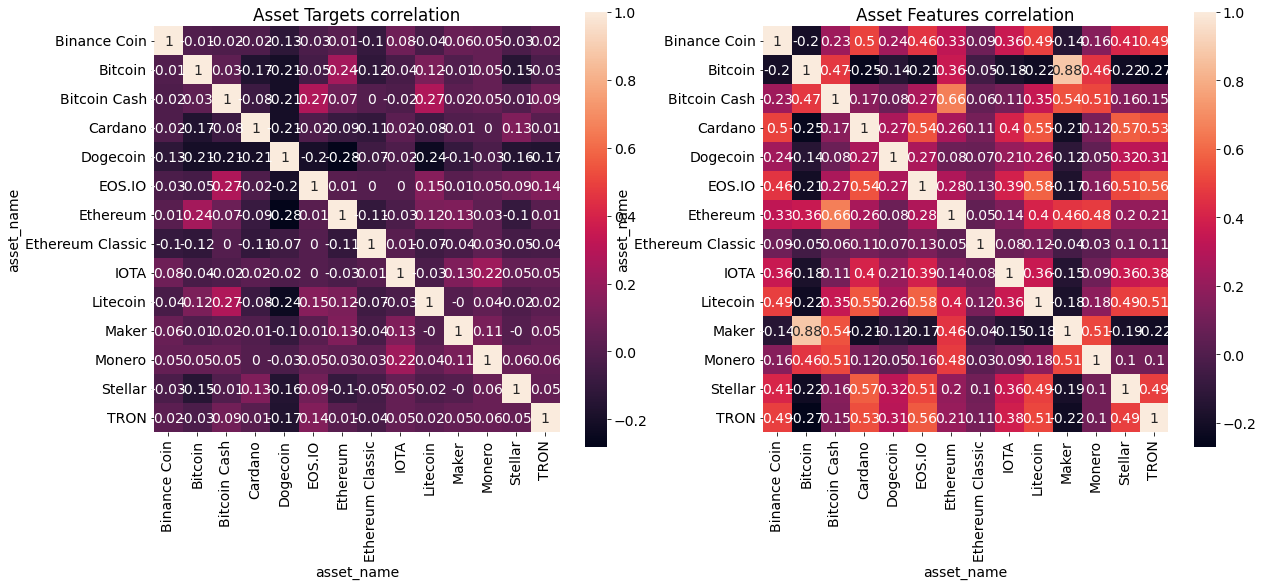

In [ ]:
train = crypto_df.copy().set_index("timestamp")
train['assets'] = 1
train['assets'] = train.groupby(by = train.index)['assets'].sum()
train['asset_name'] = train.Asset_ID.map(assets_names)
train['asset_name'].value_counts()
all_same_time = train[train['assets'] == 14][['Asset_ID', 'Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'asset_name','VWAP','Target']]
corr_target = all_same_time.reset_index().pivot(index = 'asset_name', columns = 'timestamp')['Target'].transpose().corr()
corr_matrix = all_same_time.reset_index().drop(['Target', 'Asset_ID'], axis=1).pivot(index = 'asset_name', columns = 'timestamp').transpose().corr()
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.heatmap(np.round(corr_target, 2), annot = True, ax = ax[0], square = True)
sns.heatmap(np.round(corr_matrix, 2), annot = True, ax = ax[1], square = True)
ax[0].title.set_text('Asset Targets correlation')
ax[1].title.set_text('Asset Features correlation')

In [ ]:
try: plt.close()
except: pass
fig = make_subplots(rows=7, cols=2,shared_xaxes=True, vertical_spacing=0.03, subplot_titles=tuple([assets_names[i] for i in range(14)]))
data = all_same_time[1000:2400]
data['time'] = [pd.to_datetime(x, unit='s') for x in data.index]
for i in range(14):   
    coin = data[data.Asset_ID == i]
    name = assets_names[i]
    fig.add_trace(go.Scatter(x=coin['time'], y=coin['VWAP'], name = name + ', VWAP'),row=i//2+1, col= i%2 +1)
fig.update_layout(height=1000, title_text=' Weighted average prices')
fig.show()
del data, train, crypto_df, all_same_time, corr_target

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# <span class="title-section w3-xxlarge" id="codebook">PurgedGroupTimeSeries CV with Extra Data - CatBoost Version</span>
This is a simple starter notebook for Kaggle's Crypto Comp showing purged group timeseries KFold with extra data. Purged Times Series is explained [here][2]. There are many configuration variables below to allow you to experiment. Use either CPU or GPU. You can control which years are loaded, which neural networks are used, and whether to use feature engineering. You can experiment with different data preprocessing, model hyperparameters, loss, and number of seeds to ensemble. The extra datasets contain the full history of the assets at the same format of the competition, so you can input that into your model too.

**NOTE:** this notebook lets you run a different experiment in each fold if you want to run lots of experiments. (Then it is like running multiple holdout validation experiments but in that case note that the overall CV score is meaningless because LB will be much different when the multiple experiments are ensembled to predict test). **If you want a proper CV with a reliable overall CV score you need to choose the same configuration for each fold.**

This notebook follows the ideas presented in my "Initial Thoughts" [here][1]. Some code sections have been reused from Chris' great notebook series on SIIM ISIC melanoma detection competition [here][3]

[1]: https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284903
[2]: https://www.kaggle.com/yamqwe/let-s-talk-validation-grouptimeseriessplit
[3]: https://www.kaggle.com/cdeotte/triple-stratified-kfold-with-tfrecords

____

#### <center>All baselines in the series 👇</center>

| CV + Model | Hyperparam Optimization  | Time Series Models | Feature Engineering |
| --- | --- | --- | --- |
| [Neural Network Starter](https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-with-extra-data-nn) | [MLP + AE](https://www.kaggle.com/yamqwe/bottleneck-encoder-mlp-keras-tuner)        | [LSTM](https://www.kaggle.com/yamqwe/time-series-modeling-lstm) | ⏳Technical Analysis |
| [LightGBM Starter](https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-with-extra-data-lgbm)     | [LightGBM](https://www.kaggle.com/yamqwe/purged-time-series-cv-lightgbm-optuna)     | [Wavenet](https://www.kaggle.com/yamqwe/time-series-modeling-wavenet) | ⏳Time Series Agg | 
| [Catboost Starter](https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-extra-data-catboost)      | [Catboost](https://www.kaggle.com/yamqwe/purged-time-series-cv-catboost-gpu-optuna) | [Multivariate-Transformer [written from scratch]](https://www.kaggle.com/yamqwe/time-series-modeling-multivariate-transformer) | ⏳Target Engineering |
| [XGBoost Starter](https://www.kaggle.com/yamqwe/xgb-extra-data)                                            | [XGboost](https://www.kaggle.com/yamqwe/purged-time-series-cv-xgboost-gpu-optuna) | |⏳Neutralization |
| [Supervised AE [Janestreet 1st]](https://www.kaggle.com/yamqwe/1st-place-of-jane-street-adapted-to-crypto) | [Supervised AE [Janestreet 1st]](https://www.kaggle.com/yamqwe/1st-place-of-jane-street-keras-tuner) | |⏳Quant's Volatility Features |
| [Transformer)](https://www.kaggle.com/yamqwe/let-s-test-a-transformer)                                     | [Transformer](https://www.kaggle.com/yamqwe/sh-tcoins-transformer-baseline)  | |⏳Fourier Analysis 
| [TabNet Starter](https://www.kaggle.com/yamqwe/tabnet-cv-extra-data)                                       |  |  | ⏳Wavelets | 
| [Reinforcement Learning (PPO) Starter](https://www.kaggle.com/yamqwe/g-research-reinforcement-learning-starter) |  |  

____

# <span class="title-section w3-xxlarge" id="codebook">Kaggle's G-Research Crypto Forecasting</span>
In this competition, we need to forecast returns of cryptocurrency assets. Full description [here][1]. This is a very challenging time series task as seen by looking at the sample data below.

[1]: https://www.kaggle.com/c/g-research-crypto-forecasting/overview

In [ ]:
import pandas as pd
import plotly.graph_objects as go
crypto_df = pd.read_csv("../input/g-research-crypto-forecasting/" + 'train.csv')
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
btc_mini = btc.iloc[-200:]
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.show()

# <span class="title-section w3-xxlarge" id="outline">Libraries 📚</span>
<hr>

#### Code starts here ⬇

In [ ]:
import os
import traceback
import gresearch_crypto
from scipy.stats import pearsonr
import pandas as pd, numpy as np
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# <span class="title-section w3-xxlarge" id="config">Configuration 🎚️</span>
<hr >

In order to be a proper cross validation with a meaningful overall CV score, **you need to choose the same** `INC2021`, `INC2020`, `INC2019`, `INC2018`, `INC2017`, `INCCOMP`, `INCSUPP`, and `DEPTH_NETS`, `WIDTH_NETS` **for each fold**. If your goal is to just run lots of experiments, then you can choose to have a different experiment in each fold. Then each fold is like a holdout validation experiment. When you find a configuration you like, you can use that configuration for all folds.
* DEVICE - is CPU or GPU
* SEED - a different seed produces a different triple stratified kfold split.
* FOLDS - number of folds. Best set to 3, 5, or 15 but can be any number between 2 and 15
* INC2021 - This controls whether to include the extra historical prices during 2021.
* INC2020 - This controls whether to include the extra historical prices during 2020.
* INC2019 - This controls whether to include the extra historical prices during 2019.
* INC2018 - This controls whether to include the extra historical prices during 2018.
* INC2017 - This controls whether to include the extra historical prices during 2017.
* INCCOMP - This controls whether to include the original data of the competition.
* INCSUPP - This controls whether to include the supplemented train data that was released with the competition.
* N_ESTIMATORS - is a list of length FOLDS. These are n_estimators for each fold. For maximum speed, it is best to use the smallest number of estimators as your GPU or CPU allows.
* MAX_DEPTH - is a list of length FOLDS. These are max_depths for each fold. For maximum speed, it is best to use the smallest number of estimators as your GPU or CPU allows.
* LEARNING_RATE - is a list of length FOLDS. These are learning_rates for each fold. 

In [ ]:
DEVICE = "CPU" #or "GPU"

SEED = 42

# NUMBER OF FOLDS. 
FOLDS = 5
# GAP FROM SPLIT TO SPLIT [SEE DETAILS ABOUT THE CV]
GROUP_GAP = 31

# WHICH YEARS TO INCLUDE? YES=1 NO=0
INC2021 = 0
INC2020 = 0
INC2019 = 0
INC2018 = 0
INC2017 = 0
INCCOMP = 1
INCSUPP = 0

# HYPER PARAMETERS
LEARNING_RATE = [0.09, 0.09, 0.09, 0.09, 0.09]
N_ESTIMATORS = [1000, 1000, 1000, 1000, 1000]
MAX_DEPTH = [10, 10, 10, 10, 10]

# <span class="title-section w3-xxlarge" id="loading">Data Loading 🗃️</span>
<hr>

The data organisation has already been done and saved to Kaggle datasets. Here we choose which years to load. We can use either 2017, 2018, 2019, 2020, 2021, Original, Supplement by changing the `INC2021`, `INC2020`, `INC2019`, `INC2018`, `INC2017`, `INCCOMP`, `INCSUPP` variables in the preceeding code section. These datasets are discussed [here][1].

[1]: https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285726


In [ ]:
orig_df_train = pd.read_csv('/kaggle/input/g-research-crypto-forecasting/train.csv')
supp_df_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv')
df_asset_details = pd.read_csv('/kaggle/input/g-research-crypto-forecasting/asset_details.csv').sort_values("Asset_ID")

extra_data_files = {
                        0: '../input/cryptocurrency-extra-data-binance-coin',
                        2: '../input/cryptocurrency-extra-data-bitcoin-cash',
                        1: '../input/cryptocurrency-extra-data-bitcoin',
                        3: '../input/cryptocurrency-extra-data-cardano',
                        4: '../input/cryptocurrency-extra-data-dogecoin',                        
                        5: '../input/cryptocurrency-extra-data-eos-io',
                        6: '../input/cryptocurrency-extra-data-ethereum',
                        7: '../input/cryptocurrency-extra-data-ethereum-classic', 
                        8: '../input/cryptocurrency-extra-data-iota',
                        9: '../input/cryptocurrency-extra-data-litecoin',
                        11: '../input/cryptocurrency-extra-data-monero',
                        10: '../input/cryptocurrency-extra-data-maker',
                        12: '../input/cryptocurrency-extra-data-stellar',
                        13: '../input/cryptocurrency-extra-data-tron'
                   }

def load_training_data_for_asset(asset_id):
    dfs = []        
    if INCCOMP: dfs.append(orig_df_train[orig_df_train["Asset_ID"] == asset_id].copy())
    if INCSUPP: dfs.append(supp_df_train[supp_df_train["Asset_ID"] == asset_id].copy())    
    if INC2017 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2017) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2017) + '.csv'))
    if INC2018 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2018) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2018) + '.csv'))
    if INC2019 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2019) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2019) + '.csv'))
    if INC2020 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2020) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2020) + '.csv'))
    if INC2021 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2021) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2021) + '.csv'))
    df = pd.concat(dfs, axis = 0) if len(dfs) > 1 else dfs[0]
    df['date'] = pd.to_datetime(df['timestamp'], unit = 's')        
    df = df.sort_values('date')
    return df


# <span class="title-section w3-xxlarge" id="features">Feature Engineering 🔬</span>
<hr>

This notebook uses upper_shadow, lower_shadow, high_div_low, open_sub_close, seasonality/datetime features first shown in this notebook [here][1] and successfully used by julian3833 [here][2].

Additionally we can decide to use external data by changing the variables `INC2021`, `INC2020`, `INC2019`, `INC2018`, `INC2017`, `INCCOMP`, `INCSUPP` in the preceeding code section. These variables respectively indicate whether to load last year 2021 data and/or year 2020, 2019, 2018, 2017, the original, supplemented data. These datasets are discussed [here][3]

Consider experimenting with different feature engineering and/or external data. The code to extract features out of the dataset is taken from julian3833' notebook [here][2]. Thank you julian3833, this is great work.

[1]: https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition
[2]: https://www.kaggle.com/julian3833
[3]: TBD

In [ ]:
# Two features from the competition tutorial
def upper_shadow(df): return df['High'] - np.maximum(df['Close'], df['Open'])
def lower_shadow(df): return np.minimum(df['Close'], df['Open']) - df['Low']

# A utility function to build features from the original df
def get_features(df):
    df_feat = df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].copy()
    df_feat['upper_Shadow'] = upper_shadow(df_feat)
    df_feat['lower_Shadow'] = lower_shadow(df_feat)
    df_feat["high_div_low"] = df_feat["High"] / df_feat["Low"]
    df_feat["open_sub_close"] = df_feat["Open"] - df_feat["Close"]
    return df_feat

# <span class="title-section w3-xxlarge" id="modelconf">Configure the model ⚙️</span>
<hr>

This is a simple model with simple set of hyperparameters. Consider experimenting with different models, parameters, ensembles and so on.

In [ ]:
def build_model(fold):

    # Do feel free to experiment with different models here!
    model = CatBoostRegressor(iterations = N_ESTIMATORS[fold], depth = MAX_DEPTH[fold], learning_rate = LEARNING_RATE[fold], task_type = "GPU" if DEVICE == 'GPU' else None)

    return model


# Time Series Cross Validation

> "There are many different ways one can do cross-validation, and **it is the most critical step when building a good machine learning model** which is generalizable when it comes to unseen data."
-- **Approaching (Almost) Any Machine Learning Problem**, by Abhishek Thakur

CV is the **first** step, but very few notebooks are talking about this. Here we look at "purged rolling time series CV" and actually apply it in hyperparameter tuning for a basic estimator. This notebook owes a debt of gratitude to the notebook ["Found the Holy Grail GroupTimeSeriesSplit"](https://www.kaggle.com/jorijnsmit/found-the-holy-grail-grouptimeseriessplit). That notebook is excellent and this solution is an extention of the quoted pending sklearn estimator. I modify that estimator to make it more suitable for the task at hand in this competition. The changes are

- you can specify a **gap** between each train and validation split. This is important because even though the **group** aspect keeps whole days together, we suspect that the anonymized features have some kind of lag or window calculations in them (which would be standard for financial features). By introducing a gap, we mitigate the risk that we leak information from train into validation
- we can specify the size of the train and validation splits in terms of **number of days**. The ability to specify a validation set size is new and the the ability to specify days, as opposed to samples, is new.

The code for `PurgedTimeSeriesSplit` is below. I've hiden it becaused it is really meant to act as an imported class. If you want to see the code and copy for your work, click on the "Code" box.

In [ ]:
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args

# https://github.com/getgaurav2/scikit-learn/blob/d4a3af5cc9da3a76f0266932644b884c99724c57/sklearn/model_selection/_split.py#L2243
class GroupTimeSeriesSplit(_BaseKFold):
    """Time Series cross-validator variant with non-overlapping groups.
    Provides train/test indices to split time series data samples
    that are observed at fixed time intervals according to a
    third-party provided group.
    In each split, test indices must be higher than before, and thus shuffling
    in cross validator is inappropriate.
    This cross-validation object is a variation of :class:`KFold`.
    In the kth split, it returns first k folds as train set and the
    (k+1)th fold as test set.
    The same group will not appear in two different folds (the number of
    distinct groups has to be at least equal to the number of folds).
    Note that unlike standard cross-validation methods, successive
    training sets are supersets of those that come before them.
    Read more in the :ref:`User Guide <cross_validation>`.
    Parameters
    ----------
    n_splits : int, default=5
        Number of splits. Must be at least 2.
    max_train_size : int, default=None
        Maximum size for a single training set.
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.model_selection import GroupTimeSeriesSplit
    >>> groups = np.array(['a', 'a', 'a', 'a', 'a', 'a',\
                           'b', 'b', 'b', 'b', 'b',\
                           'c', 'c', 'c', 'c',\
                           'd', 'd', 'd'])
    >>> gtss = GroupTimeSeriesSplit(n_splits=3)
    >>> for train_idx, test_idx in gtss.split(groups, groups=groups):
    ...     print("TRAIN:", train_idx, "TEST:", test_idx)
    ...     print("TRAIN GROUP:", groups[train_idx],\
                  "TEST GROUP:", groups[test_idx])
    TRAIN: [0, 1, 2, 3, 4, 5] TEST: [6, 7, 8, 9, 10]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a']\
    TEST GROUP: ['b' 'b' 'b' 'b' 'b']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] TEST: [11, 12, 13, 14]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b']\
    TEST GROUP: ['c' 'c' 'c' 'c']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]\
    TEST: [15, 16, 17]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c']\
    TEST GROUP: ['d' 'd' 'd']
    """
    @_deprecate_positional_args
    def __init__(self,
                 n_splits=5,
                 *,
                 max_train_size=None
                 ):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.max_train_size = max_train_size

    def split(self, X, y=None, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Group labels for the samples used while splitting the dataset into
            train/test set.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """
        if groups is None:
            raise ValueError(
                "The 'groups' parameter should not be None")
        X, y, groups = indexable(X, y, groups)
        n_samples = _num_samples(X)
        n_splits = self.n_splits
        n_folds = n_splits + 1
        group_dict = {}
        u, ind = np.unique(groups, return_index=True)
        unique_groups = u[np.argsort(ind)]
        n_samples = _num_samples(X)
        n_groups = _num_samples(unique_groups)
        for idx in np.arange(n_samples):
            if (groups[idx] in group_dict):
                group_dict[groups[idx]].append(idx)
            else:
                group_dict[groups[idx]] = [idx]
        if n_folds > n_groups:
            raise ValueError(
                ("Cannot have number of folds={0} greater than"
                 " the number of groups={1}").format(n_folds,
                                                     n_groups))
        group_test_size = n_groups // n_folds
        group_test_starts = range(n_groups - n_splits * group_test_size,
                                  n_groups, group_test_size)
        for group_test_start in group_test_starts:
            train_array = []
            test_array = []
            for train_group_idx in unique_groups[:group_test_start]:
                train_array_tmp = group_dict[train_group_idx]
                train_array = np.sort(np.unique(
                                      np.concatenate((train_array,
                                                      train_array_tmp)),
                                      axis=None), axis=None)
            train_end = train_array.size
            if self.max_train_size and self.max_train_size < train_end:
                train_array = train_array[train_end -
                                          self.max_train_size:train_end]
            for test_group_idx in unique_groups[group_test_start:
                                                group_test_start +
                                                group_test_size]:
                test_array_tmp = group_dict[test_group_idx]
                test_array = np.sort(np.unique(
                                              np.concatenate((test_array,
                                                              test_array_tmp)),
                                     axis=None), axis=None)
            yield [int(i) for i in train_array], [int(i) for i in test_array]
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args

# modified code for group gaps; source
# https://github.com/getgaurav2/scikit-learn/blob/d4a3af5cc9da3a76f0266932644b884c99724c57/sklearn/model_selection/_split.py#L2243
class PurgedGroupTimeSeriesSplit(_BaseKFold):
    """Time Series cross-validator variant with non-overlapping groups.
    Allows for a gap in groups to avoid potentially leaking info from
    train into test if the model has windowed or lag features.
    Provides train/test indices to split time series data samples
    that are observed at fixed time intervals according to a
    third-party provided group.
    In each split, test indices must be higher than before, and thus shuffling
    in cross validator is inappropriate.
    This cross-validation object is a variation of :class:`KFold`.
    In the kth split, it returns first k folds as train set and the
    (k+1)th fold as test set.
    The same group will not appear in two different folds (the number of
    distinct groups has to be at least equal to the number of folds).
    Note that unlike standard cross-validation methods, successive
    training sets are supersets of those that come before them.
    Read more in the :ref:`User Guide <cross_validation>`.
    Parameters
    ----------
    n_splits : int, default=5
        Number of splits. Must be at least 2.
    max_train_group_size : int, default=Inf
        Maximum group size for a single training set.
    group_gap : int, default=None
        Gap between train and test
    max_test_group_size : int, default=Inf
        We discard this number of groups from the end of each train split
    """

    @_deprecate_positional_args
    def __init__(self,
                 n_splits=5,
                 *,
                 max_train_group_size=np.inf,
                 max_test_group_size=np.inf,
                 group_gap=None,
                 verbose=False
                 ):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.max_train_group_size = max_train_group_size
        self.group_gap = group_gap
        self.max_test_group_size = max_test_group_size
        self.verbose = verbose

    def split(self, X, y=None, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Group labels for the samples used while splitting the dataset into
            train/test set.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """
        if groups is None:
            raise ValueError(
                "The 'groups' parameter should not be None")
        X, y, groups = indexable(X, y, groups)
        n_samples = _num_samples(X)
        n_splits = self.n_splits
        group_gap = self.group_gap
        max_test_group_size = self.max_test_group_size
        max_train_group_size = self.max_train_group_size
        n_folds = n_splits + 1
        group_dict = {}
        u, ind = np.unique(groups, return_index=True)
        unique_groups = u[np.argsort(ind)]
        n_samples = _num_samples(X)
        n_groups = _num_samples(unique_groups)
        for idx in np.arange(n_samples):
            if (groups[idx] in group_dict):
                group_dict[groups[idx]].append(idx)
            else:
                group_dict[groups[idx]] = [idx]
        if n_folds > n_groups:
            raise ValueError(
                ("Cannot have number of folds={0} greater than"
                 " the number of groups={1}").format(n_folds,
                                                     n_groups))

        group_test_size = min(n_groups // n_folds, max_test_group_size)
        group_test_starts = range(n_groups - n_splits * group_test_size,
                                  n_groups, group_test_size)
        for group_test_start in group_test_starts:
            train_array = []
            test_array = []

            group_st = max(0, group_test_start - group_gap - max_train_group_size)
            for train_group_idx in unique_groups[group_st:(group_test_start - group_gap)]:
                train_array_tmp = group_dict[train_group_idx]

                train_array = np.sort(np.unique(
                                      np.concatenate((train_array,
                                                      train_array_tmp)),
                                      axis=None), axis=None)

            train_end = train_array.size

            for test_group_idx in unique_groups[group_test_start:
                                                group_test_start +
                                                group_test_size]:
                test_array_tmp = group_dict[test_group_idx]
                test_array = np.sort(np.unique(
                                              np.concatenate((test_array,
                                                              test_array_tmp)),
                                     axis=None), axis=None)

            test_array  = test_array[group_gap:]


            if self.verbose > 0:
                    pass

            yield [int(i) for i in train_array], [int(i) for i in test_array]

# <span class="title-section w3-xxlarge" id="training">Training 🏋️</span>
<hr>
Our model will be trained for the number of FOLDS and EPOCHS you chose in the configuration above. Each fold the model with lowest validation loss will be saved and used to predict OOF and test. Adjust the variable `VERBOSE`. The variable `VERBOSE=1 or 2` will display the training and validation loss for each epoch as text. 

Training model for Binance Coin     (ID=0 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0097152	test: 0.0050384	best: 0.0050384 (0)	total: 124ms	remaining: 2m 3s
1:	learn: 0.0097013	test: 0.0050385	best: 0.0050384 (0)	total: 188ms	remaining: 1m 33s
2:	learn: 0.0096893	test: 0.0050383	best: 0.0050383 (2)	total: 251ms	remaining: 1m 23s
3:	learn: 0.0096765	test: 0.0050387	best: 0.0050383 (2)	total: 315ms	remaining: 1m 18s
4:	learn: 0.0096672	test: 0.0050394	best: 0.0050383 (2)	total: 376ms	remaining: 1m 14s
5:	learn: 0.0096575	test: 0.0050397	best: 0.0050383 (2)	total: 436ms	remaining: 1m 12s
6:	learn: 0.0096484	test: 0.0050400	best: 0.0050383 (2)	total: 496ms	remaining: 1m 10s
7:	learn: 0.0096388	test: 0.0050402	best: 0.0050383 (2)	total: 556ms	remaining: 1m 8s
8:	learn: 0.0096288	test: 0.0050404	best: 0.0050383 (2)	total: 618ms	remaining: 1m 8s
9:	learn: 0.0096238	test: 0.0050409	best: 0.0050383 (2)	to

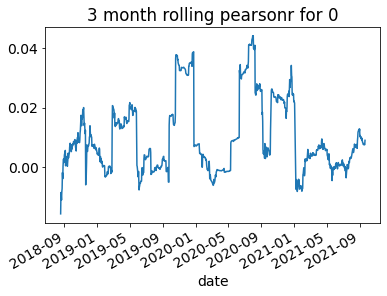

Training model for Bitcoin          (ID=1 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0020749	test: 0.0018406	best: 0.0018406 (0)	total: 81.7ms	remaining: 1m 21s
1:	learn: 0.0020717	test: 0.0018411	best: 0.0018406 (0)	total: 150ms	remaining: 1m 14s
2:	learn: 0.0020691	test: 0.0018415	best: 0.0018406 (0)	total: 216ms	remaining: 1m 11s
3:	learn: 0.0020670	test: 0.0018419	best: 0.0018406 (0)	total: 284ms	remaining: 1m 10s
4:	learn: 0.0020650	test: 0.0018436	best: 0.0018406 (0)	total: 351ms	remaining: 1m 9s
5:	learn: 0.0020631	test: 0.0018440	best: 0.0018406 (0)	total: 418ms	remaining: 1m 9s
6:	learn: 0.0020614	test: 0.0018450	best: 0.0018406 (0)	total: 483ms	remaining: 1m 8s
7:	learn: 0.0020596	test: 0.0018463	best: 0.0018406 (0)	total: 550ms	remaining: 1m 8s
8:	learn: 0.0020580	test: 0.0018466	best: 0.0018406 (0)	total: 616ms	remaining: 1m 7s
9:	learn: 0.0020566	test: 0.0018465	best: 0.0018406 (0)	tot

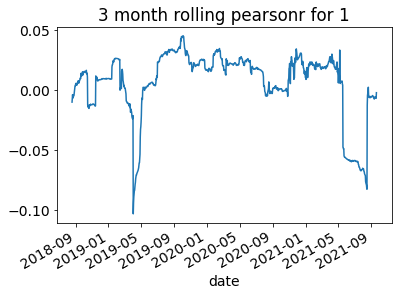

Training model for Bitcoin Cash     (ID=2 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0050541	test: 0.0133623	best: 0.0133623 (0)	total: 79.1ms	remaining: 1m 18s
1:	learn: 0.0050509	test: 0.0133619	best: 0.0133619 (1)	total: 150ms	remaining: 1m 14s
2:	learn: 0.0050482	test: 0.0133617	best: 0.0133617 (2)	total: 218ms	remaining: 1m 12s
3:	learn: 0.0050456	test: 0.0133616	best: 0.0133616 (3)	total: 288ms	remaining: 1m 11s
4:	learn: 0.0050433	test: 0.0133621	best: 0.0133616 (3)	total: 359ms	remaining: 1m 11s
5:	learn: 0.0050411	test: 0.0133620	best: 0.0133616 (3)	total: 425ms	remaining: 1m 10s
6:	learn: 0.0050384	test: 0.0133615	best: 0.0133615 (6)	total: 489ms	remaining: 1m 9s
7:	learn: 0.0050362	test: 0.0133610	best: 0.0133610 (7)	total: 558ms	remaining: 1m 9s
8:	learn: 0.0050342	test: 0.0133609	best: 0.0133609 (8)	total: 625ms	remaining: 1m 8s
9:	learn: 0.0050320	test: 0.0133608	best: 0.0133608 (9)	t

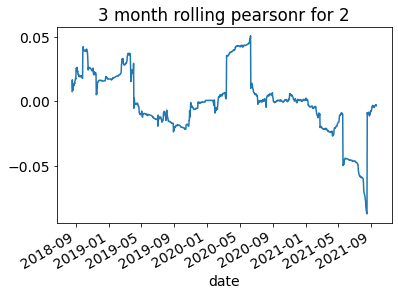

Training model for Cardano          (ID=3 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0047510	test: 0.0046155	best: 0.0046155 (0)	total: 97ms	remaining: 1m 36s
1:	learn: 0.0047486	test: 0.0046154	best: 0.0046154 (1)	total: 195ms	remaining: 1m 37s
2:	learn: 0.0047462	test: 0.0046152	best: 0.0046152 (2)	total: 260ms	remaining: 1m 26s
3:	learn: 0.0047442	test: 0.0046152	best: 0.0046152 (3)	total: 323ms	remaining: 1m 20s
4:	learn: 0.0047422	test: 0.0046151	best: 0.0046151 (4)	total: 422ms	remaining: 1m 23s
5:	learn: 0.0047403	test: 0.0046151	best: 0.0046151 (4)	total: 522ms	remaining: 1m 26s
6:	learn: 0.0047385	test: 0.0046152	best: 0.0046151 (4)	total: 606ms	remaining: 1m 25s
7:	learn: 0.0047365	test: 0.0046152	best: 0.0046151 (4)	total: 703ms	remaining: 1m 27s
8:	learn: 0.0047348	test: 0.0046153	best: 0.0046151 (4)	total: 785ms	remaining: 1m 26s
9:	learn: 0.0047336	test: 0.0046153	best: 0.0046151 (4)	

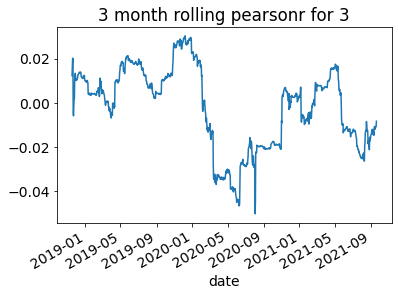

Training model for Dogecoin         (ID=4 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0058796	test: 0.0040757	best: 0.0040757 (0)	total: 47.8ms	remaining: 47.7s
1:	learn: 0.0058732	test: 0.0040755	best: 0.0040755 (1)	total: 91.9ms	remaining: 45.9s
2:	learn: 0.0058679	test: 0.0040756	best: 0.0040755 (1)	total: 136ms	remaining: 45.1s
3:	learn: 0.0058626	test: 0.0040757	best: 0.0040755 (1)	total: 180ms	remaining: 44.8s
4:	learn: 0.0058577	test: 0.0040757	best: 0.0040755 (1)	total: 224ms	remaining: 44.6s
5:	learn: 0.0058522	test: 0.0040763	best: 0.0040755 (1)	total: 266ms	remaining: 44.1s
6:	learn: 0.0058493	test: 0.0040764	best: 0.0040755 (1)	total: 312ms	remaining: 44.3s
7:	learn: 0.0058453	test: 0.0040768	best: 0.0040755 (1)	total: 357ms	remaining: 44.3s
8:	learn: 0.0058420	test: 0.0040771	best: 0.0040755 (1)	total: 400ms	remaining: 44.1s
9:	learn: 0.0058386	test: 0.0040772	best: 0.0040755 (1)	total:

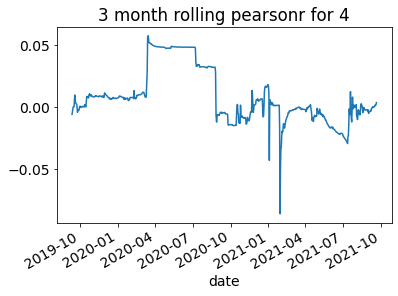

Training model for EOS.IO           (ID=5 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0080621	test: 0.0047935	best: 0.0047935 (0)	total: 72.9ms	remaining: 1m 12s
1:	learn: 0.0080561	test: 0.0047988	best: 0.0047935 (0)	total: 141ms	remaining: 1m 10s
2:	learn: 0.0080520	test: 0.0047994	best: 0.0047935 (0)	total: 205ms	remaining: 1m 8s
3:	learn: 0.0080472	test: 0.0048005	best: 0.0047935 (0)	total: 270ms	remaining: 1m 7s
4:	learn: 0.0080422	test: 0.0048009	best: 0.0047935 (0)	total: 338ms	remaining: 1m 7s
5:	learn: 0.0080372	test: 0.0048012	best: 0.0047935 (0)	total: 406ms	remaining: 1m 7s
6:	learn: 0.0080349	test: 0.0048053	best: 0.0047935 (0)	total: 473ms	remaining: 1m 7s
7:	learn: 0.0080308	test: 0.0048059	best: 0.0047935 (0)	total: 537ms	remaining: 1m 6s
8:	learn: 0.0080258	test: 0.0048071	best: 0.0047935 (0)	total: 603ms	remaining: 1m 6s
9:	learn: 0.0080217	test: 0.0048085	best: 0.0047935 (0)	total

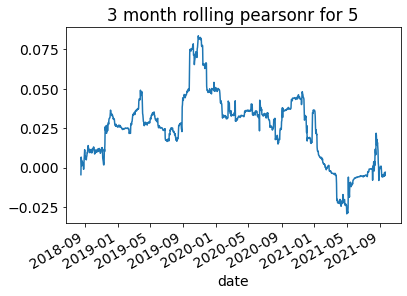

Training model for Ethereum         (ID=6 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0026600	test: 0.0028927	best: 0.0028927 (0)	total: 97.5ms	remaining: 1m 37s
1:	learn: 0.0026569	test: 0.0028925	best: 0.0028925 (1)	total: 185ms	remaining: 1m 32s
2:	learn: 0.0026536	test: 0.0028924	best: 0.0028924 (2)	total: 270ms	remaining: 1m 29s
3:	learn: 0.0026508	test: 0.0028931	best: 0.0028924 (2)	total: 361ms	remaining: 1m 29s
4:	learn: 0.0026481	test: 0.0028931	best: 0.0028924 (2)	total: 432ms	remaining: 1m 26s
5:	learn: 0.0026459	test: 0.0028931	best: 0.0028924 (2)	total: 501ms	remaining: 1m 22s
6:	learn: 0.0026442	test: 0.0028930	best: 0.0028924 (2)	total: 568ms	remaining: 1m 20s
7:	learn: 0.0026422	test: 0.0028930	best: 0.0028924 (2)	total: 633ms	remaining: 1m 18s
8:	learn: 0.0026409	test: 0.0028929	best: 0.0028924 (2)	total: 699ms	remaining: 1m 16s
9:	learn: 0.0026391	test: 0.0028932	best: 0.0028924 (2

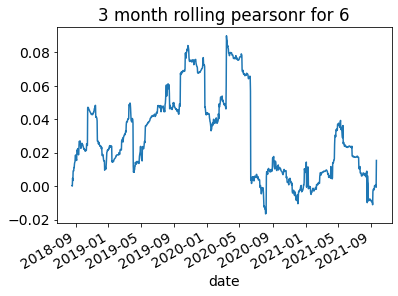

Training model for Ethereum Classic (ID=7 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0079365	test: 0.0071281	best: 0.0071281 (0)	total: 115ms	remaining: 1m 55s
1:	learn: 0.0079285	test: 0.0071378	best: 0.0071281 (0)	total: 210ms	remaining: 1m 44s
2:	learn: 0.0079231	test: 0.0071391	best: 0.0071281 (0)	total: 290ms	remaining: 1m 36s
3:	learn: 0.0079158	test: 0.0071444	best: 0.0071281 (0)	total: 377ms	remaining: 1m 33s
4:	learn: 0.0079100	test: 0.0071804	best: 0.0071281 (0)	total: 454ms	remaining: 1m 30s
5:	learn: 0.0079034	test: 0.0072412	best: 0.0071281 (0)	total: 520ms	remaining: 1m 26s
6:	learn: 0.0078971	test: 0.0073958	best: 0.0071281 (0)	total: 587ms	remaining: 1m 23s
7:	learn: 0.0078910	test: 0.0074339	best: 0.0071281 (0)	total: 651ms	remaining: 1m 20s
8:	learn: 0.0078866	test: 0.0074374	best: 0.0071281 (0)	total: 716ms	remaining: 1m 18s
9:	learn: 0.0078821	test: 0.0075213	best: 0.0071281 (0)

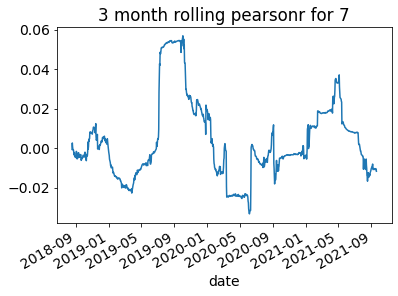

Training model for IOTA             (ID=8 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0067650	test: 0.0084175	best: 0.0084175 (0)	total: 95.2ms	remaining: 1m 35s
1:	learn: 0.0067627	test: 0.0084169	best: 0.0084169 (1)	total: 171ms	remaining: 1m 25s
2:	learn: 0.0067604	test: 0.0084196	best: 0.0084169 (1)	total: 247ms	remaining: 1m 22s
3:	learn: 0.0067583	test: 0.0084188	best: 0.0084169 (1)	total: 324ms	remaining: 1m 20s
4:	learn: 0.0067565	test: 0.0084190	best: 0.0084169 (1)	total: 413ms	remaining: 1m 22s
5:	learn: 0.0067549	test: 0.0084215	best: 0.0084169 (1)	total: 486ms	remaining: 1m 20s
6:	learn: 0.0067527	test: 0.0084239	best: 0.0084169 (1)	total: 559ms	remaining: 1m 19s
7:	learn: 0.0067506	test: 0.0084243	best: 0.0084169 (1)	total: 633ms	remaining: 1m 18s
8:	learn: 0.0067488	test: 0.0084253	best: 0.0084169 (1)	total: 697ms	remaining: 1m 16s
9:	learn: 0.0067473	test: 0.0084271	best: 0.0084169 (1

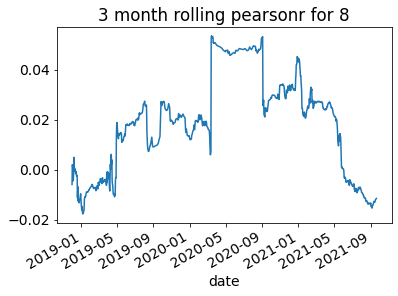

Training model for Litecoin         (ID=9 )
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0035500	test: 0.0042998	best: 0.0042998 (0)	total: 72.2ms	remaining: 1m 12s
1:	learn: 0.0035460	test: 0.0042998	best: 0.0042998 (1)	total: 138ms	remaining: 1m 8s
2:	learn: 0.0035422	test: 0.0042997	best: 0.0042997 (2)	total: 207ms	remaining: 1m 8s
3:	learn: 0.0035386	test: 0.0042998	best: 0.0042997 (2)	total: 274ms	remaining: 1m 8s
4:	learn: 0.0035358	test: 0.0042999	best: 0.0042997 (2)	total: 342ms	remaining: 1m 7s
5:	learn: 0.0035326	test: 0.0043001	best: 0.0042997 (2)	total: 406ms	remaining: 1m 7s
6:	learn: 0.0035298	test: 0.0042999	best: 0.0042997 (2)	total: 471ms	remaining: 1m 6s
7:	learn: 0.0035273	test: 0.0042998	best: 0.0042997 (2)	total: 538ms	remaining: 1m 6s
8:	learn: 0.0035249	test: 0.0042998	best: 0.0042997 (2)	total: 604ms	remaining: 1m 6s
9:	learn: 0.0035226	test: 0.0043001	best: 0.0042997 (2)	total:

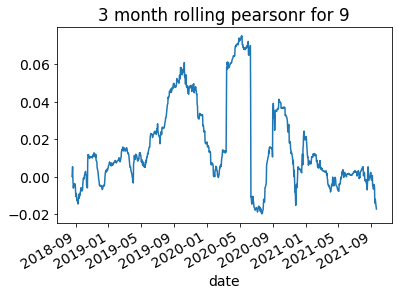

Training model for Maker            (ID=10)
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0153765	test: 0.0069982	best: 0.0069982 (0)	total: 17.5ms	remaining: 17.5s
1:	learn: 0.0152375	test: 0.0070119	best: 0.0069982 (0)	total: 33.9ms	remaining: 16.9s
2:	learn: 0.0151208	test: 0.0070190	best: 0.0069982 (0)	total: 49.6ms	remaining: 16.5s
3:	learn: 0.0149941	test: 0.0070291	best: 0.0069982 (0)	total: 67ms	remaining: 16.7s
4:	learn: 0.0149299	test: 0.0070321	best: 0.0069982 (0)	total: 68ms	remaining: 13.5s
5:	learn: 0.0148859	test: 0.0070363	best: 0.0069982 (0)	total: 68.9ms	remaining: 11.4s
6:	learn: 0.0147917	test: 0.0070607	best: 0.0069982 (0)	total: 86.1ms	remaining: 12.2s
7:	learn: 0.0146328	test: 0.0071074	best: 0.0069982 (0)	total: 103ms	remaining: 12.8s
8:	learn: 0.0145739	test: 0.0071106	best: 0.0069982 (0)	total: 106ms	remaining: 11.7s
9:	learn: 0.0144267	test: 0.0071238	best: 0.0069982 (0)	total

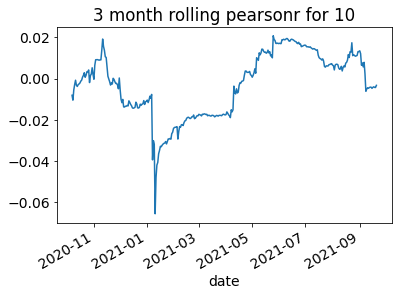

Training model for Monero           (ID=11)
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0099679	test: 0.0092555	best: 0.0092555 (0)	total: 52.9ms	remaining: 52.9s
1:	learn: 0.0099517	test: 0.0092597	best: 0.0092555 (0)	total: 96.8ms	remaining: 48.3s
2:	learn: 0.0099375	test: 0.0092603	best: 0.0092555 (0)	total: 140ms	remaining: 46.4s
3:	learn: 0.0099237	test: 0.0092813	best: 0.0092555 (0)	total: 183ms	remaining: 45.5s
4:	learn: 0.0099112	test: 0.0092819	best: 0.0092555 (0)	total: 227ms	remaining: 45.2s
5:	learn: 0.0098995	test: 0.0092936	best: 0.0092555 (0)	total: 271ms	remaining: 44.9s
6:	learn: 0.0098896	test: 0.0094234	best: 0.0092555 (0)	total: 314ms	remaining: 44.5s
7:	learn: 0.0098797	test: 0.0094525	best: 0.0092555 (0)	total: 358ms	remaining: 44.3s
8:	learn: 0.0098693	test: 0.0094748	best: 0.0092555 (0)	total: 402ms	remaining: 44.3s
9:	learn: 0.0098602	test: 0.0095151	best: 0.0092555 (0)	total:

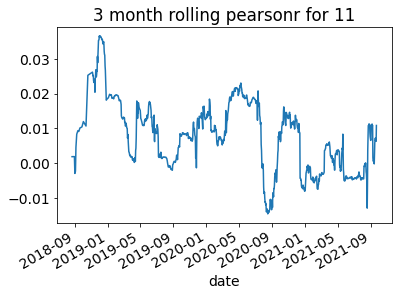

Training model for Stellar          (ID=12)
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0077554	test: 0.0052455	best: 0.0052455 (0)	total: 47.8ms	remaining: 47.7s
1:	learn: 0.0077482	test: 0.0052537	best: 0.0052455 (0)	total: 88.3ms	remaining: 44.1s
2:	learn: 0.0077423	test: 0.0052712	best: 0.0052455 (0)	total: 129ms	remaining: 42.7s
3:	learn: 0.0077374	test: 0.0052835	best: 0.0052455 (0)	total: 168ms	remaining: 41.8s
4:	learn: 0.0077314	test: 0.0052947	best: 0.0052455 (0)	total: 209ms	remaining: 41.6s
5:	learn: 0.0077277	test: 0.0052985	best: 0.0052455 (0)	total: 247ms	remaining: 41s
6:	learn: 0.0077236	test: 0.0052994	best: 0.0052455 (0)	total: 287ms	remaining: 40.8s
7:	learn: 0.0077188	test: 0.0053116	best: 0.0052455 (0)	total: 326ms	remaining: 40.5s
8:	learn: 0.0077144	test: 0.0053170	best: 0.0052455 (0)	total: 365ms	remaining: 40.2s
9:	learn: 0.0077104	test: 0.0053294	best: 0.0052455 (0)	total: 4

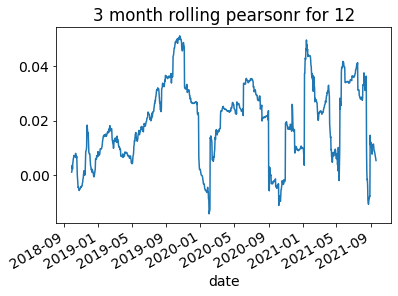

Training model for TRON             (ID=13)
#########################
#### FOLD 1
#### Training N_ESTIMATORS 1000 | MAX_DEPTH 10 | LEARNING_RATE 0.09
Training...
0:	learn: 0.0078026	test: 0.0052354	best: 0.0052354 (0)	total: 65.5ms	remaining: 1m 5s
1:	learn: 0.0077983	test: 0.0052356	best: 0.0052354 (0)	total: 123ms	remaining: 1m 1s
2:	learn: 0.0077941	test: 0.0052379	best: 0.0052354 (0)	total: 178ms	remaining: 59.1s
3:	learn: 0.0077905	test: 0.0052437	best: 0.0052354 (0)	total: 234ms	remaining: 58.3s
4:	learn: 0.0077864	test: 0.0052434	best: 0.0052354 (0)	total: 293ms	remaining: 58.3s
5:	learn: 0.0077821	test: 0.0052437	best: 0.0052354 (0)	total: 349ms	remaining: 57.8s
6:	learn: 0.0077781	test: 0.0052442	best: 0.0052354 (0)	total: 405ms	remaining: 57.5s
7:	learn: 0.0077744	test: 0.0052464	best: 0.0052354 (0)	total: 461ms	remaining: 57.1s
8:	learn: 0.0077715	test: 0.0052447	best: 0.0052354 (0)	total: 523ms	remaining: 57.6s
9:	learn: 0.0077691	test: 0.0052483	best: 0.0052354 (0)	total: 

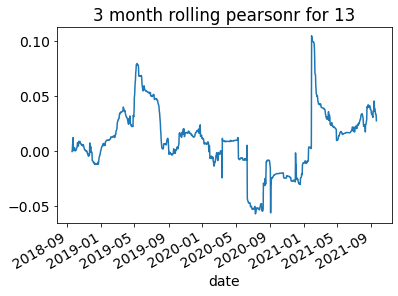

In [ ]:
# USE VERBOSE=0 for silent, VERBOSE=1 for interactive, VERBOSE=2 for commit
VERBOSE = 1

def get_Xy_and_model_for_asset(asset_id):
    df = load_training_data_for_asset(asset_id)
    df_proc = get_features(df)
    df_proc['date'] = df['date'].copy()
    df_proc['y'] = df['Target']
    df_proc = df_proc.dropna(how="any")
    X = df_proc.drop("y", axis=1)
    y = df_proc["y"]
    groups = pd.factorize(X['date'].dt.day.astype(str) + '_' + X['date'].dt.month.astype(str) + '_' + X['date'].dt.year.astype(str))[0]
    X = X.drop(columns = 'date')
    oof_preds = np.zeros(len(X))
    scores, models = [], []

    for fold, (train_idx, val_idx) in enumerate(PurgedGroupTimeSeriesSplit(n_splits = FOLDS, group_gap = GROUP_GAP).split(X, y, groups)):
        # GET TRAINING, VALIDATION SET
        x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # DISPLAY FOLD INFO
        print('#' * 25); print('#### FOLD', fold + 1)
        print('#### Training N_ESTIMATORS %s | MAX_DEPTH %s | LEARNING_RATE %s' % (N_ESTIMATORS[fold], MAX_DEPTH[fold], LEARNING_RATE[fold]))

        model = build_model(fold)

        # TRAIN
        print('Training...')
        model.fit( x_train, y_train, eval_set = [(x_val, y_val)], early_stopping_rounds = 50 )

        # PREDICT OOF
        print('Predicting OOF...')
        pred = model.predict(x_val)
        models.append(model)       
        
        # REPORT RESULTS
        try: mse = mean_squared_error(np.nan_to_num(y_val), np.nan_to_num(pred))
        except: mse = 0.0

        scores.append(mse)
        oof_preds[val_idx] = pred
        print('#### FOLD %i OOF MSE %s' % (fold + 1, mse))

    df = df_proc
    df['oof_preds'] = oof_preds
    print('\n\n' + ('-' * 80) + '\n' + 'Finished training %s. \nResults:\n')
    print('r2_score:', r2_score(df['y'], df['oof_preds']))
    print('pearsonr:', pearsonr(df['y'], df['oof_preds'])[0])
    print('Model std: %s | Target std: %s' % (df['oof_preds'].std(), df['y'].std()))
    try: plt.close()
    except: pass
    df2 = df.reset_index().set_index('date')
    df2['y'].rolling(3 * 30 * 24 * 60).corr(df2['oof_preds']).iloc[::24 * 60].plot()
    plt.title('3 month rolling pearsonr for {}'.format(str(asset_id)))
    plt.show()
    
    return scores, oof_preds, models

models = {}
scores = {}
oof_preds = {}
for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print(f"Training model for {asset_name:<16} (ID={asset_id:<2})")
    cur_scores, cur_oof_preds, cur_models = get_Xy_and_model_for_asset(asset_id)
    scores[asset_id], oof_preds[asset_id], models[asset_id] = np.mean(cur_scores), cur_oof_preds, cur_models

# <span class="title-section w3-xxlarge" id="codebook">Calculate OOF MSE</span>
The OOF (out of fold) predictions are saved to disk. If you wish to ensemble multiple models, use the OOF to determine what are the best weights to blend your models with. Choose weights that maximize OOF CV score when used to blend OOF. Then use those same weights to blend your test predictions.

In [ ]:
# COMPUTE OVERALL OOF MSE
print('Overall MEAN OOF MSE %s' % np.mean(list(scores.values())))

# SAVE OOF TO DISK 
for asset in oof_preds:
    df_oof = pd.DataFrame({'asset_id': asset, 'oof_preds': oof_preds[asset]})
    df_oof.to_csv(str(asset) + '_oof.csv',index=False)
    df_oof.head()

Overall MEAN OOF MSE 3.300083866053002e-05


# <span class="title-section w3-xxlarge" id="submit">Submit To Kaggle 🇰</span>
<hr>

In [ ]:
all_df_test = []

env = gresearch_crypto.make_env()
iter_test = env.iter_test()

for i, (df_test, df_pred) in enumerate(iter_test):
    for j , row in df_test.iterrows():
        try:
            if row['Asset_ID'] in models:
                cur_models = models[row['Asset_ID']]
                x_test = get_features(row)
                y_pred = np.mean(np.concatenate([np.expand_dims(model.predict([x_test]), axis = 0) for model in cur_models], axis = 0), axis = 0)
            else: y_pred = 0.0
        except: 
            y_pred = 0.0
            traceback.print_exc()
        df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = y_pred
    all_df_test.append(df_test)
    env.predict(df_pred)


This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


# <span class="title-section w3-xxlarge">References</span>

<span id="f1">1.</span> [Initial baseline notebook](https://www.kaggle.com/julian3833)<br>
<span id="f2">2.</span> [Competition tutorial](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition)<br>
<span id="f3">3.</span> [Competition Overview](https://www.kaggle.com/c/g-research-crypto-forecasting/overview)</span><br>
<span id="f4">4.</span> [My Initial Ideas for this competition](https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/284903)</span><br>
<span id="f5">5.</span> [My post notebook about cross validation](https://www.kaggle.com/yamqwe/let-s-talk-validation-grouptimeseriessplit)</span><br>
<span id="f5">6.</span> [Chris original notebook from SIIM ISIC](https://www.kaggle.com/cdeotte/triple-stratified-kfold-with-tfrecords)</span><br>

<span class="title-section w3-large w3-tag">WORK IN PROGRESS! 🚧</span>